## Problem Statement

### The hospitals are evaluating efficiency of Insulin based treatment for patients Recommend if solo insulin treatments work well towards the above stated objective Should we recommend solo insulin or does it work better in conjunction with other drugs/ treatement ?

In [2]:
import numpy as np
import pandas as pd
import missingno as mn
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Reference Sites!!
http://archive.ics.uci.edu/ml/datasets/Diabetes+130-US+hospitals+for+years+1999-2008(# Project Discription)
http://www.residentmar.io/2016/03/28/missingno.html (# missingno Package Description)
https://medium.com/@kuldeepnpatel/chi-square-test-of-independence-bafd14028250 (# Chi-Square Test)
https://medium.com/open-machine-learning-course/open-machine-learning-course-topic-1-exploratory-data-analysis-with-pandas-de57880f1a68 (# Python Functions)

## Feature Discription:
### 1.Patient identifiers (encounter_id,patient_nbr)
#### Encounter_id is a unique identifier for each admission, and patient_nbr uniquely identifies each patient (encounter_id varies for every visit by the patient but patient_nbr going to be same)
### 2.Patient Demographics
#### race, age, gender, weight cover the basic demographic information associated with each patient.  
#### Payer_code is an additional variable that identifies which health insurance (Medicare /Medicaid / Commercial) the patient holds.
### 3.Admission and discharge details
#### admission_source_id and admission_type_id identify who referred the patient to the hospital (e.g. physician vs. emergency dept.)
#### and what type of admission this was (Emergency vs. Elective vs. Urgent). And 
#### discharge_disposition_id indicates where the patient was discharged to after treatment.
### 4.Patient Medical History
#### num_outpatient: number of outpatient visits by the patient in the year prior to the current encounter
#### num_inpatient: number of inpatient visits by the patient in the year prior to the current encounter
#### num_emergency: number of emergency visits by the patient in the year prior to the current encounter
### 5.Patient admission details
#### medical_specialty: the specialty of the physician admitting the patient
#### diag_1, diag_2, diag_3: ICD9 codes for the primary, secondary and tertiary diagnoses of the patient. 
##### ICD9 are the universal codes that all physicians use to record diagnoses. There are various easy to use tools to lookup what individual codes mean (Wikipedia is pretty decent on its own)
#### time_in_hospital: the patient's length of stay in the hospital (in days)
#### number_diagnoses: Total no. of diagnosis entered for the patient
#### num_lab_procedures: No. of lab procedures performed in the current encounter
#### num_procedures: No. of non-lab procedures performed in the current encounter
#### num_medications: No. of distinct medications prescribed in the current encounter
### 6.Clinical Results
#### max_glu_serum: indicates results of the glucose serum test
#### A1Cresult: indicates results of the A1c test
### 7.Medication Details
#### diabetesMed: indicates if any diabetes medication was prescribed
#### change: indicates if there was a change in diabetes medication
#### 24 medication variables: indicate whether the dosage of the medicines was changed in any manner during the encounter
### 8.Readmission indicator
#####    Indicates whether a patient was readmitted after a particular admission. 
####    There are 3 levels for this variable: “NO” = no readmission, “< 30” = readmission within 30 days and 
####    “> 30” = readmission after more than 30 days. 
##### The 30 day distinction is of practical importance to hospitals because federal regulations penalize hospitals for an excessive proportion of such readmissions. 
##   The event of interest is readmitted within < 30 days.

In [3]:
diabetic = pd.read_csv('diabetic_data.csv')

In [4]:
diabetic.shape

(101766, 50)

### data contains 50 columns and 101766 rows.

In [5]:
diabetic.head().T

,0,1,2,3,4
encounter_id,2278392,149190,64410,500364,16680
patient_nbr,8222157,55629189,86047875,82442376,42519267
race,Caucasian,Caucasian,AfricanAmerican,Caucasian,Caucasian
gender,Female,Female,Female,Male,Male
age,[0-10),[10-20),[20-30),[30-40),[40-50)
weight,?,?,?,?,?
admission_type_id,6,1,1,1,1
discharge_disposition_id,25,1,1,1,1
admission_source_id,1,7,7,7,7
time_in_hospital,1,3,2,2,1


In [6]:
diabetic.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [7]:
diabetic.describe().T

,count,mean,std,min,25%,50%,75%,max
encounter_id,101766.0,1.652016e+08,1.026403e+08,12522.0,84961194.0,152388987.0,2.302709e+08,443867222.0
patient_nbr,101766.0,5.433040e+07,3.869636e+07,135.0,23413221.0,45505143.0,8.754595e+07,189502619.0
admission_type_id,101766.0,2.024006e+00,1.445403e+00,1.0,1.0,1.0,3.000000e+00,8.0
discharge_disposition_id,101766.0,3.715642e+00,5.280166e+00,1.0,1.0,1.0,4.000000e+00,28.0
admission_source_id,101766.0,5.754437e+00,4.064081e+00,1.0,1.0,7.0,7.000000e+00,25.0
time_in_hospital,101766.0,4.395987e+00,2.985108e+00,1.0,2.0,4.0,6.000000e+00,14.0
num_lab_procedures,101766.0,4.309564e+01,1.967436e+01,1.0,31.0,44.0,5.700000e+01,132.0
num_procedures,101766.0,1.339730e+00,1.705807e+00,0.0,0.0,1.0,2.000000e+00,6.0
num_medications,101766.0,1.602184e+01,8.127566e+00,1.0,10.0,15.0,2.000000e+01,81.0
number_outpatient,101766.0,3.693572e-01,1.267265e+00,0.0,0.0,0.0,0.000000e+00,42.0


In [8]:
diabetic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
encounter_id                101766 non-null int64
patient_nbr                 101766 non-null int64
race                        101766 non-null object
gender                      101766 non-null object
age                         101766 non-null object
weight                      101766 non-null object
admission_type_id           101766 non-null int64
discharge_disposition_id    101766 non-null int64
admission_source_id         101766 non-null int64
time_in_hospital            101766 non-null int64
payer_code                  101766 non-null object
medical_specialty           101766 non-null object
num_lab_procedures          101766 non-null int64
num_procedures              101766 non-null int64
num_medications             101766 non-null int64
number_outpatient           101766 non-null int64
number_emergency            101766 non-null int64
number_inpatient            10176

In [9]:
diabetic.corr()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
encounter_id,1.000000,0.512028,-0.158961,-0.132876,-0.112402,-0.062221,-0.026062,-0.014225,0.076113,0.103756,0.082803,0.030962,0.265149
patient_nbr,0.512028,1.000000,-0.011128,-0.136814,-0.032568,-0.024092,0.015946,-0.015570,0.020665,0.103379,0.062352,0.012480,0.226847
admission_type_id,-0.158961,-0.011128,1.000000,0.083483,0.106654,-0.012500,-0.143713,0.129888,0.079535,0.026511,-0.019116,-0.038161,-0.117126
discharge_disposition_id,-0.132876,-0.136814,0.083483,1.000000,0.018193,0.162748,0.023415,0.015921,0.108753,-0.008715,-0.024471,0.020787,0.046891
admission_source_id,-0.112402,-0.032568,0.106654,0.018193,1.000000,-0.006965,0.048885,-0.135400,-0.054533,0.027244,0.059892,0.036314,0.072114
time_in_hospital,-0.062221,-0.024092,-0.012500,0.162748,-0.006965,1.000000,0.318450,0.191472,0.466135,-0.008916,-0.009681,0.073623,0.220186
num_lab_procedures,-0.026062,0.015946,-0.143713,0.023415,0.048885,0.318450,1.000000,0.058066,0.268161,-0.007602,-0.002279,0.039231,0.152773
num_procedures,-0.014225,-0.015570,0.129888,0.015921,-0.135400,0.191472,0.058066,1.000000,0.385767,-0.024819,-0.038179,-0.066236,0.073734
num_medications,0.076113,0.020665,0.079535,0.108753,-0.054533,0.466135,0.268161,0.385767,1.000000,0.045197,0.013180,0.064194,0.261526
number_outpatient,0.103756,0.103379,0.026511,-0.008715,0.027244,-0.008916,-0.007602,-0.024819,0.045197,1.000000,0.091459,0.107338,0.094152


In [10]:
diabetic.race.value_counts()
#Caucasian : The color adjectives used in 1779 are weiss "white" (Caucasian race), gelbbraun "yellow-brown" (Mongolian race),
            #schwarz "black" (Aethiopian race), kupferroth "copper-red" (American race) and schwarzbraun "black-brown" (Malayan race).
#AfricanAmerican : relating to black Americans   
#Hispanic : People of Spanish speaking Origin(Include Spain and does not include Brail)


Caucasian          76099
AfricanAmerican    19210
?                   2273
Hispanic            2037
Other               1506
Asian                641
Name: race, dtype: int64

In [ ]:
!pip install quilt
!quilt install ResidentMario/missingno_data

distributed 1.23.3 requires msgpack, which is not installed.
keras 2.2.4 has requirement keras_applications>=1.0.6, but you'll have keras-applications 1.0.4 which is incompatible.
keras 2.2.4 has requirement keras_preprocessing>=1.0.5, but you'll have keras-preprocessing 1.0.2 which is incompatible.
You are using pip version 10.0.1, however version 18.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [ ]:
!pip install missingno

Description of variables:
->The dataset used covers ~50 different variables to describe every hospital diabetes admission. 
  In this section we give an overview and brief description of the variables in this dataset.

#Patient identifiers:
 Encounter_id is a unique identifier for each admission, and patient_nbr uniquely identifies each patient


In [11]:
diabetic.head(2)

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30


In [12]:
diabetic.replace('?' , np.NaN, inplace=True)

In [13]:
diabetic.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),NaN,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),NaN,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),NaN,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),NaN,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [14]:
diabetic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
encounter_id                101766 non-null int64
patient_nbr                 101766 non-null int64
race                        99493 non-null object
gender                      101766 non-null object
age                         101766 non-null object
weight                      3197 non-null object
admission_type_id           101766 non-null int64
discharge_disposition_id    101766 non-null int64
admission_source_id         101766 non-null int64
time_in_hospital            101766 non-null int64
payer_code                  61510 non-null object
medical_specialty           51817 non-null object
num_lab_procedures          101766 non-null int64
num_procedures              101766 non-null int64
num_medications             101766 non-null int64
number_outpatient           101766 non-null int64
number_emergency            101766 non-null int64
number_inpatient            101766 non

In [15]:
diabetic.diag_1.value_counts()

428       6862
414       6581
786       4016
410       3614
486       3508
427       2766
491       2275
715       2151
682       2042
434       2028
780       2019
996       1967
276       1889
38        1688
250.8     1680
599       1595
584       1520
V57       1207
250.6     1183
518       1115
820       1082
577       1057
493       1056
435       1016
562        989
574        965
296        896
560        876
250.7      871
250.13     851
          ... 
V60          1
994          1
543          1
837          1
366          1
250.51       1
817          1
V51          1
363          1
10           1
957          1
391          1
V07          1
988          1
649          1
684          1
834          1
V67          1
97           1
V70          1
870          1
E909         1
143          1
915          1
216          1
691          1
207          1
375          1
671          1
832          1
Name: diag_1, Length: 716, dtype: int64

In [16]:
for column in diabetic.columns:
    if diabetic[column].dtype == 'object':
        diabetic[column] = diabetic[column].astype('category') 
    else:
        pass

In [17]:
diabetic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
encounter_id                101766 non-null int64
patient_nbr                 101766 non-null int64
race                        99493 non-null category
gender                      101766 non-null category
age                         101766 non-null category
weight                      3197 non-null category
admission_type_id           101766 non-null int64
discharge_disposition_id    101766 non-null int64
admission_source_id         101766 non-null int64
time_in_hospital            101766 non-null int64
payer_code                  61510 non-null category
medical_specialty           51817 non-null category
num_lab_procedures          101766 non-null int64
num_procedures              101766 non-null int64
num_medications             101766 non-null int64
number_outpatient           101766 non-null int64
number_emergency            101766 non-null int64
number_inpatient          

In [18]:
diabetic.admission_type_id = diabetic.admission_type_id.astype('category')
diabetic.discharge_disposition_id = diabetic.discharge_disposition_id.astype('category')
diabetic.admission_source_id = diabetic.admission_source_id.astype('category')

In [19]:
diabetic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
encounter_id                101766 non-null int64
patient_nbr                 101766 non-null int64
race                        99493 non-null category
gender                      101766 non-null category
age                         101766 non-null category
weight                      3197 non-null category
admission_type_id           101766 non-null category
discharge_disposition_id    101766 non-null category
admission_source_id         101766 non-null category
time_in_hospital            101766 non-null int64
payer_code                  61510 non-null category
medical_specialty           51817 non-null category
num_lab_procedures          101766 non-null int64
num_procedures              101766 non-null int64
num_medications             101766 non-null int64
number_outpatient           101766 non-null int64
number_emergency            101766 non-null int64
number_inpatient 

In [20]:
#5 point summary stats
id_columns = ['encounter_id', 'patient_nbr','admission_type_id','discharge_disposition_id','admission_source_id']
#The above columns are droped because these are only certain numbers for identification
diabetic.drop(columns = id_columns).describe().T

,count,mean,std,min,25%,50%,75%,max
time_in_hospital,101766.0,4.395987,2.985108,1.0,2.0,4.0,6.0,14.0
num_lab_procedures,101766.0,43.095641,19.674362,1.0,31.0,44.0,57.0,132.0
num_procedures,101766.0,1.339730,1.705807,0.0,0.0,1.0,2.0,6.0
num_medications,101766.0,16.021844,8.127566,1.0,10.0,15.0,20.0,81.0
number_outpatient,101766.0,0.369357,1.267265,0.0,0.0,0.0,0.0,42.0
number_emergency,101766.0,0.197836,0.930472,0.0,0.0,0.0,0.0,76.0
number_inpatient,101766.0,0.635566,1.262863,0.0,0.0,0.0,1.0,21.0
number_diagnoses,101766.0,7.422607,1.933600,1.0,6.0,8.0,9.0,16.0


In [21]:
# Inference from the summary Statistics:
#   - The min time spent in hospital is 1 day while max is 14 days. Median being 4
#   - Few patients had to go through a number of lab procedures, as high as 132
#   - Medications for few patients are as high as 81
#   - Patients have visited the hospitals as outpatient for as much as 42
#   - Emergency visits are also high for some cases - 76

# Visualising and Analysing Missing Values

# Matrix

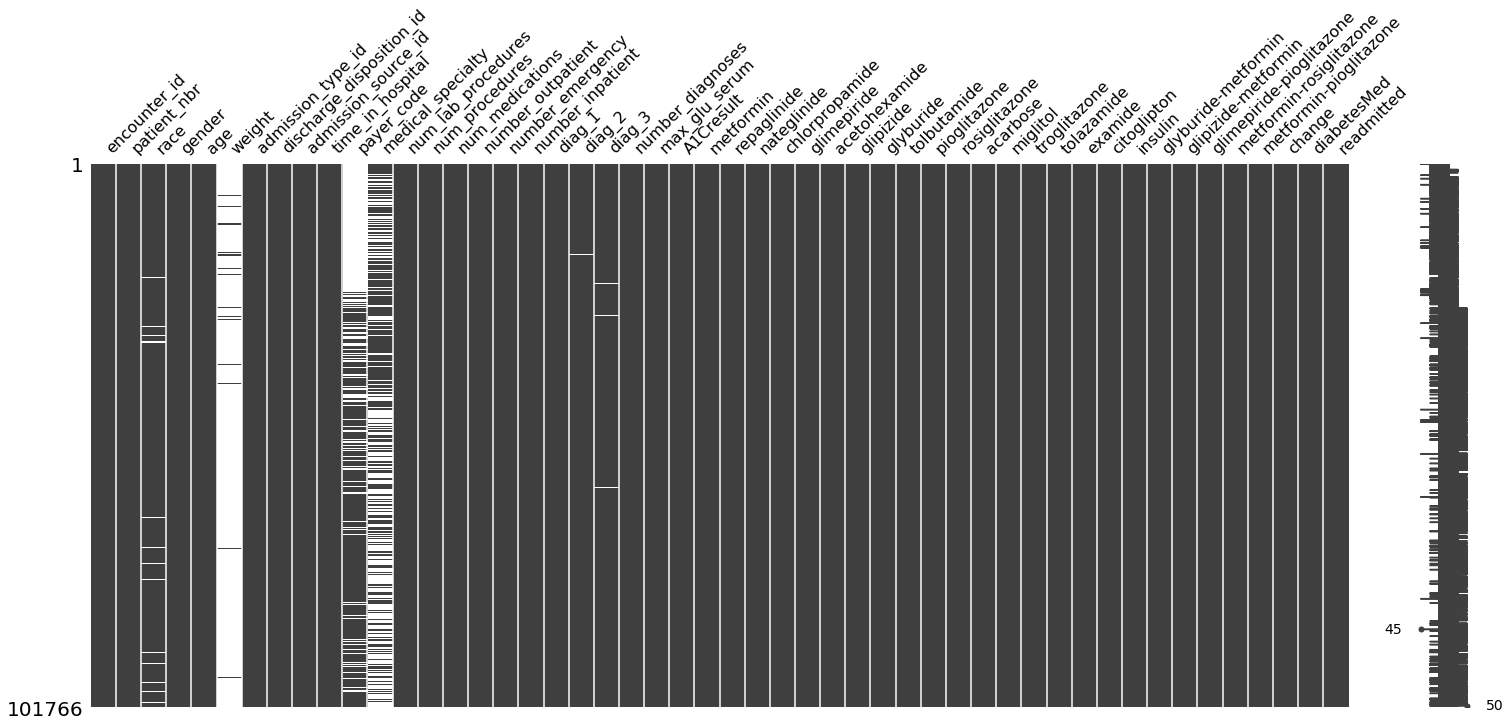

In [22]:
mn.matrix(diabetic)

##### The mn.matrix nullity matrix is a data-dense display which lets you quickly visually pick out patterns in data completion.
##### This visualization will comfortably accommodate up to 50 labelled variables. Past that range labels begin to overlap or become unreadable, and by default large displays omit them.

In [23]:
# Columns which contains missing values are race, weight, payer_code, medical_specialty, diag_1, diag_2, diag_3

# Bar Chart

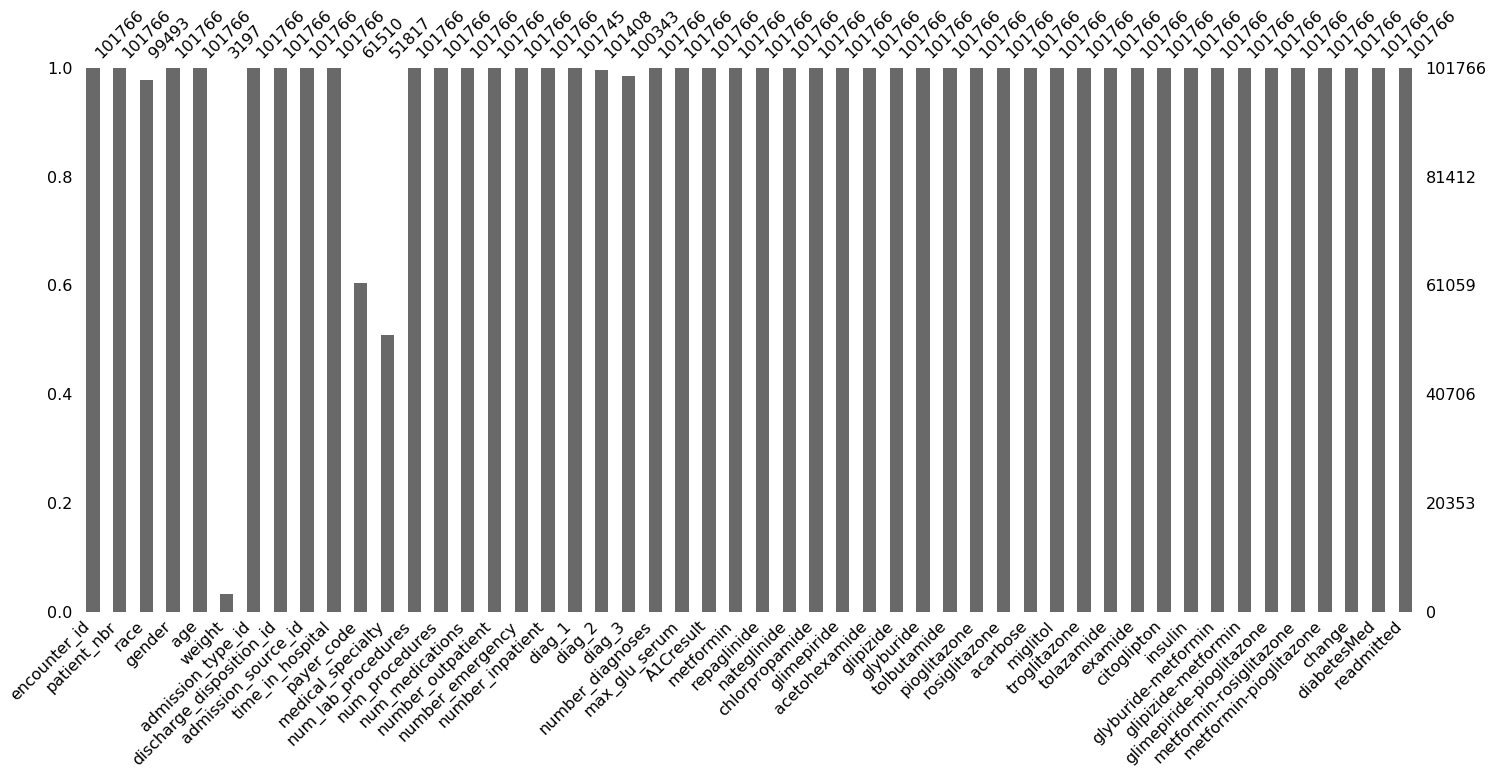

In [24]:
#mn.bar is a simple visualization of nullity by column
mn.bar(diabetic)

# Heat Map

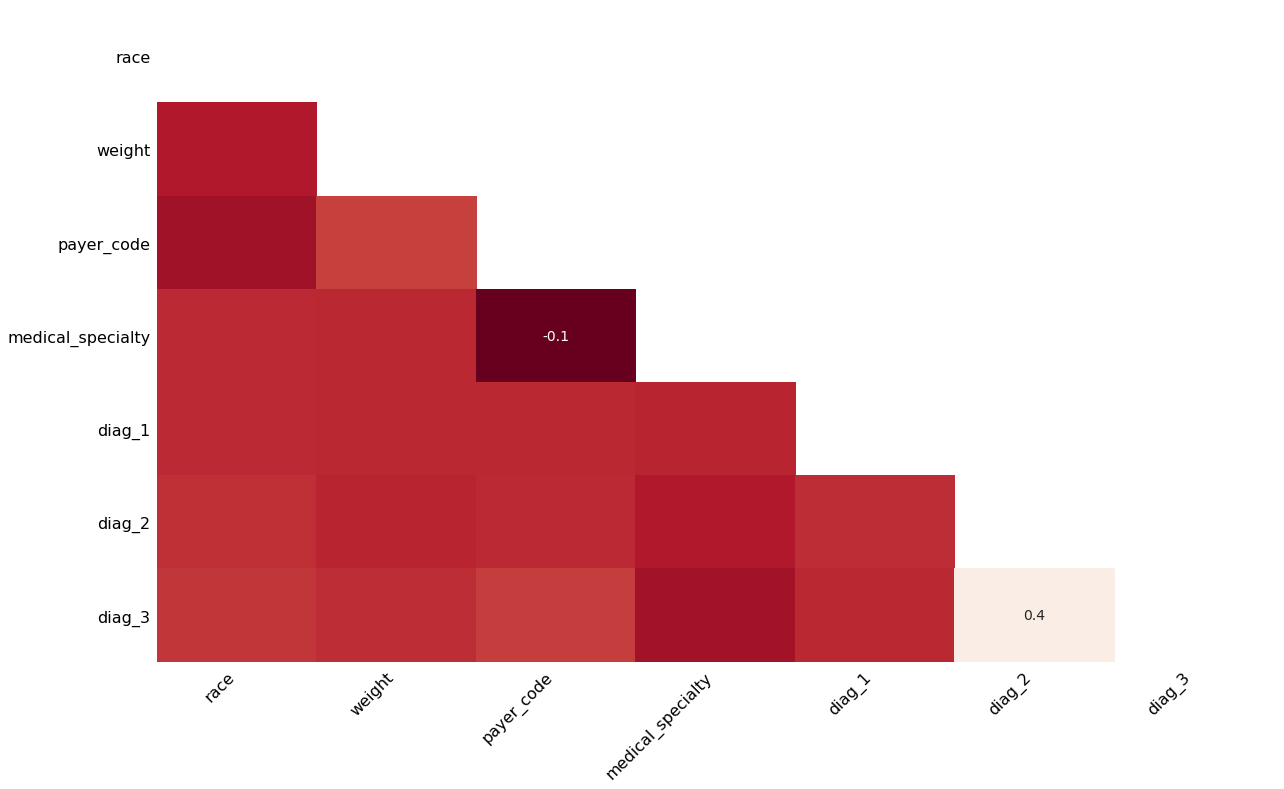

In [25]:
mn.heatmap(diabetic)

##### The missingno correlation heatmap measures nullity correlation: how strongly the presence or absence of one variable affects the presence of another.
##### Nullity correlation ranges from -1 (if one variable appears the other definitely does not) to 0 (variables appearing or not appearing have no effect on one another) to 1 (if one variable appears the other definitely also does).
##### Variables that are always full or always empty have no meaningful correlation, and so are silently removed from the visualization—in this case for instance gender,age and patient_nbr columns, which are completely filled, are not included.

In [26]:
# Any columns that are 100% populated do not show up in this matrix, which is why we see the 7 columns that we do. 

# We see the correlation value of -0.1 between the Payer_code and Medical_Specialty columns. A correlation of -1 means if one 
# column has a value, the other NEVER has a value. A correlation of 1 means if one column has a value the other 
# ALWAYS has a value. The value we see between Medical_specialty and Payer_code means roughly: more often than not, patients
# that have a diag_2 have an diag_3.

# If there are shaded boxes in the heatmap with no numbers, that means the correlation is very close to (but not exactly) 0, 
# meaning there is no relationship at all between the presense of the variables. In this case, and based upon the fact 
# we didn't see missing values for these columns in the matrix, we can assume there are a small number of missing values
# for these columns and they're randomly distributed.

# Dendrogram

### The dendrogram allows you to more fully correlate variable completion, revealing trends deeper than the pairwise ones visible in the correlation heatmap.

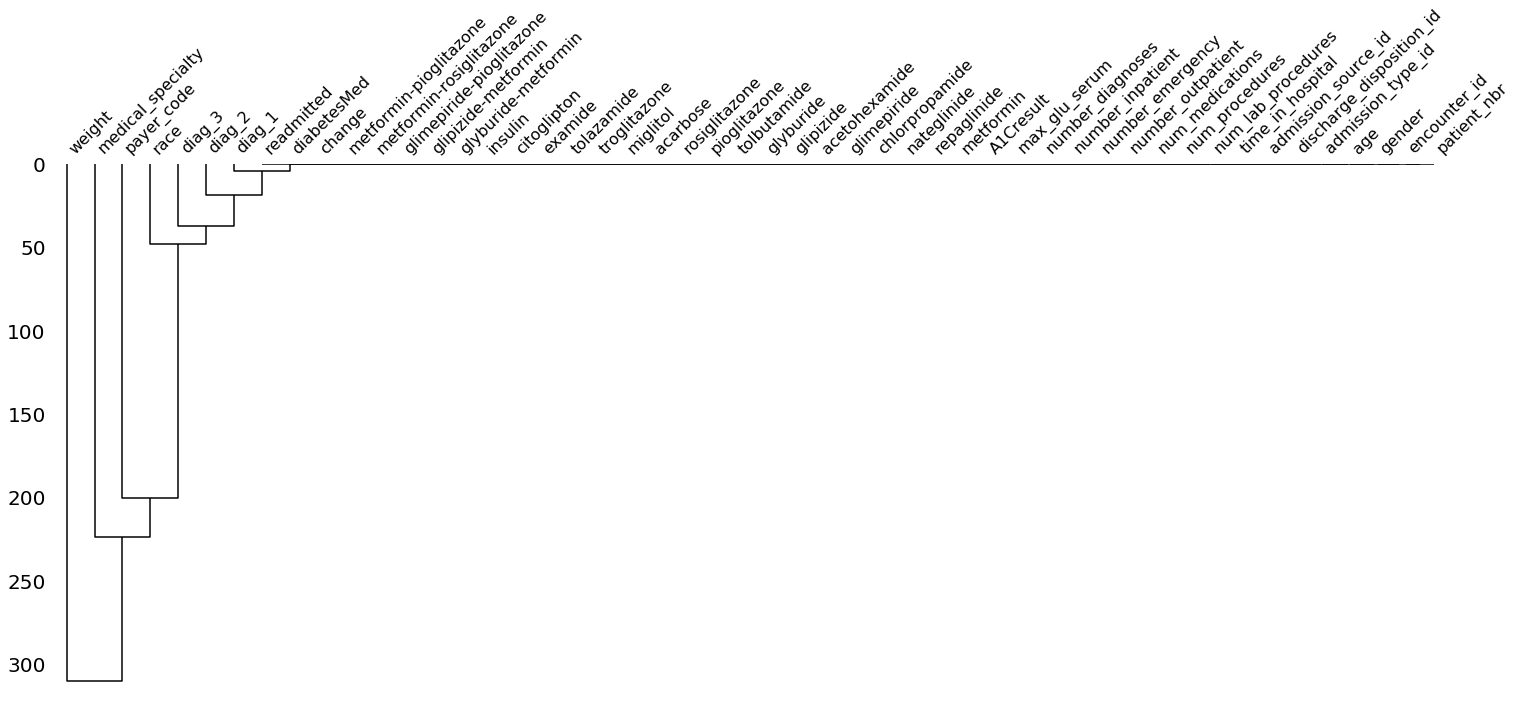

In [27]:
mn.dendrogram(diabetic)

### Checking the Percentage of data is missing in the data

In [28]:
diabetic.race.replace(np.NaN, 'Race-Missing').value_counts()

Caucasian          76099
AfricanAmerican    19210
Race-Missing        2273
Hispanic            2037
Other               1506
Asian                641
Name: race, dtype: int64

In [29]:
# normalize = True will give in terms of Percentages of nullity data missing 

In [30]:
diabetic.race.replace(np.NaN, 'Race-Missing').value_counts(normalize = True)

Caucasian          0.747784
AfricanAmerican    0.188766
Race-Missing       0.022336
Hispanic           0.020017
Other              0.014799
Asian              0.006299
Name: race, dtype: float64

In [31]:
diabetic.weight.replace(np.NaN, 'Weight-Missing').value_counts(normalize = True)

Weight-Missing    0.968585
[75-100)          0.013128
[50-75)           0.008814
[100-125)         0.006142
[125-150)         0.001425
[25-50)           0.000953
[0-25)            0.000472
[150-175)         0.000344
[175-200)         0.000108
>200              0.000029
Name: weight, dtype: float64

In [32]:
diabetic.payer_code.replace(np.NaN, 'Missing').value_counts(normalize = True)

Missing    0.395574
MC         0.318761
HM         0.061651
SP         0.049201
BC         0.045742
MD         0.034707
CP         0.024890
UN         0.024055
CM         0.019034
OG         0.010151
PO         0.005817
DM         0.005395
CH         0.001435
WC         0.001327
OT         0.000934
MP         0.000776
SI         0.000540
FR         0.000010
Name: payer_code, dtype: float64

In [33]:
diabetic.medical_specialty.replace(np.NaN, 'Missing').value_counts(normalize = True)

Missing                              0.490822
InternalMedicine                     0.143810
Emergency/Trauma                     0.074337
Family/GeneralPractice               0.073109
Cardiology                           0.052591
Surgery-General                      0.030452
Nephrology                           0.015850
Orthopedics                          0.013757
Orthopedics-Reconstructive           0.012116
Radiologist                          0.011202
Pulmonology                          0.008559
Psychiatry                           0.008392
Urology                              0.006731
ObstetricsandGynecology              0.006594
Surgery-Cardiovascular/Thoracic      0.006407
Gastroenterology                     0.005542
Surgery-Vascular                     0.005238
Surgery-Neuro                        0.004599
PhysicalMedicineandRehabilitation    0.003842
Oncology                             0.003420
Pediatrics                           0.002496
Hematology/Oncology               

In [34]:
#Checking the target class proportion
diabetic.readmitted.value_counts(normalize = True)

NO     0.539119
>30    0.349282
<30    0.111599
Name: readmitted, dtype: float64

In [35]:
#Checking the target class
diabetic.readmitted.value_counts()

NO     54864
>30    35545
<30    11357
Name: readmitted, dtype: int64

## Subsetting Numerical and Categorical Columns

In [36]:
categorical_data = diabetic.select_dtypes(include='category')
numerical_data = diabetic.select_dtypes(include='int64')
print(categorical_data.shape)
print(numerical_data.shape)

(101766, 40)
(101766, 10)


In [37]:
categorical_data.head()

,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,payer_code,medical_specialty,diag_1,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,Caucasian,Female,[0-10),NaN,6,25,1,NaN,Pediatrics-Endocrinology,250.83,...,No,No,No,No,No,No,No,No,No,NO
1,Caucasian,Female,[10-20),NaN,1,1,7,NaN,NaN,276,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,AfricanAmerican,Female,[20-30),NaN,1,1,7,NaN,NaN,648,...,No,No,No,No,No,No,No,No,Yes,NO
3,Caucasian,Male,[30-40),NaN,1,1,7,NaN,NaN,8,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,Caucasian,Male,[40-50),NaN,1,1,7,NaN,NaN,197,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [38]:
numerical_data.head()

,encounter_id,patient_nbr,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
0,2278392,8222157,1,41,0,1,0,0,0,1
1,149190,55629189,3,59,0,18,0,0,0,9
2,64410,86047875,2,11,5,13,2,0,1,6
3,500364,82442376,2,44,1,16,0,0,0,7
4,16680,42519267,1,51,0,8,0,0,0,5


## Framing of Hypothesis and Testing : (Categorical Values)

In [39]:
from scipy.stats import chisquare,chi2_contingency

The chi-square test is one of the most common ways to examine relationships between two or more categorical variables. Not surprisingly, It involves calculating a number, called the chi-square statistic - χ2. Which follows a chi-square distribution. The chi-square test relies on the difference between observed and expected values.

#### Goodness of Fit Test between 2 categorical variables

### H0: There is no relationship between 2 categorical Variables
#####      i.e.,The two categorical variables are independent of each other
### Ha: There is a relationship between 2 categorical Variables
#####   i.e., The two categorical variables are dependent of each other


In [40]:
# Goodness of Fit Test between 2 categorical variables Gender and Weight

# H0: The two categorical variables Gender and Weight are independent
# Ha: The two categorical variables are dependent

In [41]:
#Creating a new category for missing weight
diabetic.weight = diabetic.weight.replace(np.NaN, 'Weight-Missing')
diabetic.weight.value_counts()

Weight-Missing    98569
[75-100)           1336
[50-75)             897
[100-125)           625
[125-150)           145
[25-50)              97
[0-25)               48
[150-175)            35
[175-200)            11
>200                  3
Name: weight, dtype: int64

In [55]:
# Creating contingency table
contingency = pd.crosstab(diabetic.gender,diabetic.weight,margins=True)

In [56]:
contingency

weight,>200,Weight-Missing,[0-25),[100-125),[125-150),[150-175),[175-200),[25-50),[50-75),[75-100),All
gender,,,,,,,,,,,
Female,2,53060,22,242,60,18,5,71,595,633,54708
Male,1,45506,26,383,85,17,6,26,302,703,47055
Unknown/Invalid,0,3,0,0,0,0,0,0,0,0,3
All,3,98569,48,625,145,35,11,97,897,1336,101766


In [57]:
chi2, p, dof, ex = chi2_contingency(contingency)

In [58]:
print('P-Value is : ' , p)

P-Value is :  5.752331250046188e-20


### Considering 5% as the significance level, as the p value is less than 0.05, we reject the null hypothesis that the 
### weight category is independent of Gender.

In [60]:
# Goodness of Fit Test between 2 categorical variables Race and Weight

# H0: The two categorical variables Race and Weight are independent
# Ha: The two categorical variables are dependent

In [62]:
#Creating a new category for the missing race
diabetic.race = diabetic.race.replace(np.NaN, 'Race-Missing')
diabetic.race.value_counts(normalize = True)

Caucasian          0.747784
AfricanAmerican    0.188766
Race-Missing       0.022336
Hispanic           0.020017
Other              0.014799
Asian              0.006299
Name: race, dtype: float64

In [64]:
contingency = pd.crosstab(diabetic.race,diabetic.weight,margins=True)

In [65]:
contingency

weight,>200,Weight-Missing,[0-25),[100-125),[125-150),[150-175),[175-200),[25-50),[50-75),[75-100),All
race,,,,,,,,,,,
AfricanAmerican,1,19097,6,27,5,1,1,4,25,43,19210
Asian,0,632,0,0,0,0,0,0,8,1,641
Caucasian,2,73192,40,567,129,33,9,88,816,1223,76099
Hispanic,0,2037,0,0,0,0,0,0,0,0,2037
Other,0,1476,1,2,2,0,0,1,12,12,1506
Race-Missing,0,2135,1,29,9,1,1,4,36,57,2273
All,3,98569,48,625,145,35,11,97,897,1336,101766


In [66]:
chi2, p, dof, ex = chi2_contingency(contingency)

In [67]:
print('P-Value is : ' , p)

P-Value is :  3.3763874559071715e-108
